In [1]:
import simulation_record_charging_amount_751_1
from datetime import timedelta as td
from datetime import datetime as time
import pandas as pd
import numpy as np
import pickle

In [2]:
start_time = time(2017,7,1,hour= 6)
end_time=start_time+ td(weeks=15)
estations = [3254, 3267, 3199, 3202, 3276, 3192, 3186, 3183, 3213, 3072, 3178, 3290, 491, 3285, 3314, 411, 3165, 3205, 383, 527, 3357, 347, 474, 484, 504, 3244, 2021, 3282, 528, 529, 2008, 531, 518, 3383, 3427, 3443, 3137, 3139, 3156, 426, 3436, 3372, 3376, 3184, 363, 3134, 3163, 3283, 3286, 444, 472, 3293, 3295, 281, 514, 402, 3132, 285, 3164, 435, 423, 486, 3173, 3224, 537, 3056, 365, 252, 3146, 359, 387, 388, 405, 410, 3203, 152, 284, 434, 3129, 3151, 3323, 328, 490, 280, 540, 146, 3349, 3366, 3367, 3162, 3336, 3167, 503, 507, 315, 3150, 319, 229, 238, 442, 3226, 327, 446, 479, 499, 508, 513, 316, 335, 3145, 173, 3258, 127, 305, 309, 223, 356, 3320, 128, 296, 433, 3306, 3307, 3308, 3310, 2000, 3312, 3315, 2002, 3318, 2003, 3321, 3328, 3329, 3331, 2006, 432, 3297, 3298, 3346, 3303, 3351, 3356, 3304, 3358, 3360, 3361, 3362, 3370, 3311, 340, 421, 422, 427, 430, 336, 539, 545, 3319, 546, 428, 523, 251, 397, 3148, 3288, 3158, 419, 420, 3294, 332, 249, 396, 3141, 3142, 3292, 3263, 536, 248, 3289, 3259, 3260, 395, 3428, 3136, 3429, 3434, 3435, 3373, 3438, 3378, 3440, 3423, 3447, 3449, 3453, 3382, 3454, 3457, 3459, 3461, 3462, 3463, 3464, 3466, 519, 497, 459, 358, 3002, 368, 3256, 151, 293, 382, 168, 3255, 505, 477, 3374, 379, 457, 509, 458, 462]
initial_stations=eval(open(("steady_states_751/steady_ebikes_initial_0.5.txt")).read())
for station in initial_stations.keys():
    if station in estations:
        initial_stations[station]['edock'] = initial_stations[station]['ecap']
    else:
        initial_stations[station]['edock'] = 0
gc=simulation_record_charging_amount_751_1.GlobalClock(start_time,end_time,initial_stations)
gc.clockAdvance() 

the total number of ebikes: 11051
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
2017-07-08 06:00:01.737806 1
2017-07-15 06:00:01.744434 2
2017-07-22 06:00:02.855804 3
2017-07-29 06:00:01.329994 4
2017-08-05 06:00:01.525286 5
2017-08-12 06:00:03.063485 6
2017-08-19 06:00:00.264223 7
2017-08-26 06:00:00.430995 8
2017-09-02 06:00:02.018839 9
2017-09-09 06:00:03.952528 10
2017-09-16 06:00:01.065072 11
2017-09-23 06:00:00.248393 12
2017-09-30 06:00:03.172397 13
2017-10-07 06:00:00.635320 14
2017-10-14 06:00:04.158294 15


In [4]:
cycle_time = td(days = 7)
initial_stations=eval(open("steady_states_751/steady_ebikes_initial_0.5.txt").read())

In [5]:
#10 swaps for gradient method
for iteration in range(7):
    for i in range(5):
        gc.clear_charging_info()
        gc.end_time = gc.end_time + cycle_time
        gc.clockAdvance()
    #performance.append(gc.week_out_of_battery_duration[5*(iteration+1)-1])
    e_station_SOC = {}
    station_SOC = {}
    for sta in gc.stations.keys():
        if gc.stations[sta].edock > 0:
            e_station_SOC[sta] = gc.stations[sta].charging_amount
        else:
            station_SOC[sta] = gc.stations[sta].charging_amount
    #est_gradient.append(dict(e_station_SOC))
    #st_gradient.append(dict(station_SOC))
    sorted_e_station_SOC = sorted(e_station_SOC.items(),key=lambda kv: kv[1],reverse=False)
    sorted_station_SOC = sorted(station_SOC.items(),key=lambda kv: kv[1],reverse=True)
    print (str(sorted_e_station_SOC[0][1]),str(sorted_station_SOC[0][1]),str(sorted_e_station_SOC[0][1]<sorted_station_SOC[0][1]))
    estations.remove(sorted_e_station_SOC[0][0])
    estations.append(sorted_station_SOC[0][0])
    print(str(sorted_e_station_SOC[0][0]),str(sorted_station_SOC[0][0]))
    for station in initial_stations.keys():
        gc.stations[station].edock = 0
    for station in estations:
        gc.stations[station].edock = initial_stations[station]['ecap']   
print(estations)

2017-10-21 06:00:04.282021 16
2017-10-28 06:00:04.571424 17
2017-11-04 06:00:00.066952 18
2017-11-11 06:00:01.131771 19
2017-11-18 06:00:01.077111 20
2160.869415805335 2934269.8459608005 True
248 3016
2017-11-25 06:00:00.062874 21
2017-12-02 06:00:02.711070 22
2017-12-09 06:00:00.525378 23
2017-12-16 06:00:06.271210 24
2017-12-23 06:00:00.367694 25
2196.504756130539 2359654.2170281736 True
421 217
2017-12-30 06:00:00.167987 26
2018-01-06 06:00:01.355662 27
2018-01-13 06:00:01.141032 28
2018-01-20 06:00:00.667130 29
2018-01-27 06:00:02.855454 30
2321.6715172488275 1471955.8529803357 True
3356 324
2018-02-03 06:00:00.224626 31
2018-02-10 06:00:02.070910 32
2018-02-17 06:00:00.908408 33
2018-02-24 06:00:00.454088 34
2018-03-03 06:00:06.385785 35
2212.513501310998 1648137.4226547813 True
3370 83
2018-03-10 06:00:03.262300 36
2018-03-17 06:00:01.471252 37
2018-03-24 06:00:08.590985 38
2018-03-31 06:00:00.910473 39
2018-04-07 06:00:00.330450 40
2316.661282630668 1246332.3251945712 True
3213 

In [7]:
afile = open('6_swaps_outOfBattery.pickle', 'wb')
pickle.dump(gc, afile)
afile.close()

In [38]:
file = open('10swap.pickle', 'rb')
gc = pickle.load(file)
file.close()

In [39]:
estations = []
for st in gc.stations.keys():
    if gc.stations[st].edock > 0:
        estations.append(st)
estations

[83,
 127,
 128,
 146,
 151,
 152,
 168,
 173,
 217,
 223,
 229,
 237,
 238,
 249,
 251,
 252,
 280,
 281,
 284,
 285,
 293,
 296,
 305,
 309,
 315,
 316,
 319,
 324,
 327,
 328,
 332,
 335,
 336,
 340,
 347,
 356,
 358,
 359,
 363,
 365,
 368,
 379,
 382,
 383,
 387,
 388,
 395,
 396,
 397,
 401,
 402,
 405,
 410,
 411,
 419,
 422,
 423,
 426,
 427,
 428,
 430,
 432,
 433,
 434,
 435,
 442,
 444,
 446,
 457,
 458,
 459,
 462,
 472,
 474,
 477,
 479,
 484,
 486,
 490,
 491,
 497,
 499,
 503,
 504,
 505,
 507,
 508,
 509,
 513,
 514,
 518,
 519,
 523,
 527,
 528,
 529,
 531,
 536,
 537,
 539,
 540,
 545,
 546,
 2000,
 2002,
 2003,
 2006,
 2008,
 2021,
 3002,
 3016,
 3056,
 3093,
 3107,
 3112,
 3129,
 3132,
 3134,
 3136,
 3137,
 3139,
 3141,
 3142,
 3145,
 3146,
 3148,
 3150,
 3151,
 3156,
 3158,
 3162,
 3163,
 3164,
 3165,
 3167,
 3173,
 3178,
 3183,
 3184,
 3186,
 3192,
 3199,
 3202,
 3203,
 3205,
 3224,
 3226,
 3244,
 3254,
 3255,
 3256,
 3258,
 3259,
 3260,
 3263,
 3267,
 3276,
 3282

In [11]:
length = len(gc.week_out_of_battery_duration.keys())

In [12]:
length

67

In [6]:
import matplotlib.pyplot as plt

In [14]:
durations = []
i = 1
while (i < length):
    durations.append(gc.week_out_of_battery_duration[i])
    i += 1
durations

[0,
 732820.8054747904,
 1614685.739066584,
 1386921.9546737545,
 1757461.4791895049,
 1908263.628324314,
 2562294.070164594,
 2569868.988722531,
 1791636.1278869137,
 4075902.908855967,
 2617780.120129157,
 2415049.91974698,
 2031897.8384866267,
 2230886.8176450245,
 1992226.7698854916,
 1873642.8462564535,
 2145439.1159321293,
 3394353.358812079,
 2591123.1885061935,
 4975132.72375346,
 3692582.0174183995,
 3260446.891628824,
 2579963.485807419,
 1626867.5436395854,
 2090388.8416403309,
 2465796.454964258,
 2229633.2178659514,
 1593501.3094696552,
 1233322.2366469651,
 2063999.4384459853,
 4436920.364381969,
 1619466.7394911647,
 2936315.2389176786,
 1551498.9465539455,
 1864072.250748679,
 2464171.4853966385,
 2893476.0030902773,
 2309543.5784630924,
 1642898.4604717195,
 1695941.1193241775,
 3097492.2098169625,
 1558972.3184905946,
 3545654.7350037694,
 1926017.6835122854,
 3457313.2267710418,
 2796230.961872235,
 3382245.2974028587,
 4269310.751011014,
 3132762.5095471144,
 314755

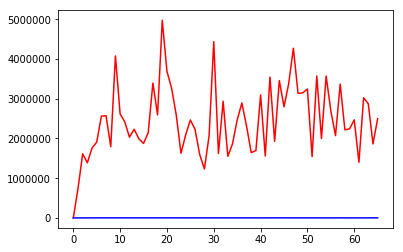

In [22]:
plt.plot(durations,'r')
plt.plot(events,'b')

In [16]:
gc.week_out_of_battery

{0: 0,
 1: 0,
 2: 262,
 3: 436,
 4: 634,
 5: 864,
 6: 650,
 7: 1145,
 8: 1248,
 9: 1162,
 10: 1158,
 11: 1185,
 12: 1239,
 13: 1328,
 14: 1544,
 15: 1401,
 16: 1489,
 17: 1468,
 18: 1289,
 19: 1374,
 20: 1364,
 21: 1287,
 22: 1166,
 23: 1356,
 24: 1071,
 25: 999,
 26: 1098,
 27: 1080,
 28: 1078,
 29: 907,
 30: 1013,
 31: 1109,
 32: 1001,
 33: 1014,
 34: 1012,
 35: 1000,
 36: 1106,
 37: 929,
 38: 941,
 39: 896,
 40: 831,
 41: 841,
 42: 858,
 43: 948,
 44: 1204,
 45: 1044,
 46: 1181,
 47: 1095,
 48: 877,
 49: 904,
 50: 782,
 51: 1027,
 52: 813,
 53: 921,
 54: 837,
 55: 873,
 56: 814,
 57: 822,
 58: 1047,
 59: 879,
 60: 838,
 61: 856,
 62: 772,
 63: 771,
 64: 831,
 65: 930,
 66: 806}

In [20]:
events = []
i = 1
while (i < length):
    events.append(gc.week_out_of_battery[i])
    i += 1
events

[0,
 262,
 436,
 634,
 864,
 650,
 1145,
 1248,
 1162,
 1158,
 1185,
 1239,
 1328,
 1544,
 1401,
 1489,
 1468,
 1289,
 1374,
 1364,
 1287,
 1166,
 1356,
 1071,
 999,
 1098,
 1080,
 1078,
 907,
 1013,
 1109,
 1001,
 1014,
 1012,
 1000,
 1106,
 929,
 941,
 896,
 831,
 841,
 858,
 948,
 1204,
 1044,
 1181,
 1095,
 877,
 904,
 782,
 1027,
 813,
 921,
 837,
 873,
 814,
 822,
 1047,
 879,
 838,
 856,
 772,
 771,
 831,
 930,
 806]

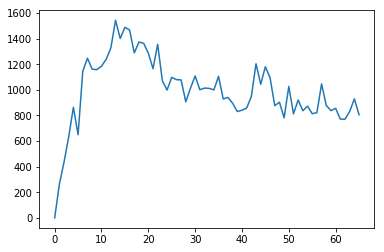

In [21]:
plt.plot(events)

In [40]:
cycle_time = td(days = 7)

In [41]:
initial_stations=eval(open("steady_states_751/steady_ebikes_initial_0.5.txt").read())

In [42]:
#10 swaps
for iteration in range(10):
    for i in range(5):
        gc.clear_charging_info()
        gc.end_time = gc.end_time + cycle_time
        gc.clockAdvance()
    #performance.append(gc.week_out_of_battery_duration[5*(iteration+1)-1])
    e_station_SOC = {}
    station_SOC = {}
    for sta in gc.stations.keys():
        if gc.stations[sta].edock > 0:
            e_station_SOC[sta] = gc.stations[sta].charging_amount
        else:
            station_SOC[sta] = gc.stations[sta].charging_amount
    #est_gradient.append(dict(e_station_SOC))
    #st_gradient.append(dict(station_SOC))
    sorted_e_station_SOC = sorted(e_station_SOC.items(),key=lambda kv: kv[1],reverse=False)
    sorted_station_SOC = sorted(station_SOC.items(),key=lambda kv: kv[1],reverse=True)
    print (str(sorted_e_station_SOC[0][1]),str(sorted_station_SOC[0][1]),str(sorted_e_station_SOC[0][1]<sorted_station_SOC[0][1]))
    estations.remove(sorted_e_station_SOC[0][0])
    estations.append(sorted_station_SOC[0][0])
    print(str(sorted_e_station_SOC[0][0]),str(sorted_station_SOC[0][0]))
    for station in initial_stations.keys():
        gc.stations[station].edock = 0
    for station in estations:
        gc.stations[station].edock = initial_stations[station]['ecap']   
print(estations)

2018-10-06 06:00:04.368582 66
2018-10-13 06:00:01.991923 67
2018-10-20 06:00:00.759477 68
2018-10-27 06:00:02.852712 69
2018-11-03 06:00:00.695971 70
1963.6764413646376 1300788.568153586 True
3205 532
2018-11-10 06:00:00.980228 71
2018-11-17 06:00:00.905123 72
2018-11-24 06:00:02.285456 73
2018-12-01 06:00:01.532738 74
2018-12-08 06:00:00.325324 75
1685.0734076965748 1121609.8663169704 True
3184 3116
2018-12-15 06:00:00.063786 76
2018-12-22 06:00:02.720417 77
2018-12-29 06:00:02.362349 78
2019-01-05 06:00:02.760353 79
2019-01-12 06:00:00.973441 80
2388.7457653891774 1285811.9648288707 True
3357 265
2019-01-19 06:00:00.342367 81
2019-01-26 06:00:01.234360 82
2019-02-02 06:00:00.276675 83
2019-02-09 06:00:00.019247 84
2019-02-16 06:00:00.183178 85
2353.7533372256034 1108276.904454349 True
3457 465
2019-02-23 06:00:06.856104 86
2019-03-02 06:00:03.887752 87
2019-03-09 06:00:00.811773 88
2019-03-16 06:00:03.425300 89
2019-03-23 06:00:01.245014 90
2391.7240742439494 1070194.7590725753 True


KeyError: 100

In [43]:
length = len(gc.week_out_of_battery_duration.keys())

In [44]:
events = []
i = 1
while (i < length):
    events.append(gc.week_out_of_battery[i])
    i += 1
events

[0,
 262,
 436,
 634,
 864,
 650,
 1145,
 1248,
 1162,
 1158,
 1185,
 1239,
 1328,
 1544,
 1401,
 1489,
 1468,
 1289,
 1374,
 1364,
 1287,
 1166,
 1356,
 1071,
 999,
 1098,
 1080,
 1078,
 907,
 1013,
 1109,
 1001,
 1014,
 1012,
 1000,
 1106,
 929,
 941,
 896,
 831,
 841,
 858,
 948,
 1204,
 1044,
 1181,
 1095,
 877,
 904,
 782,
 1027,
 813,
 921,
 837,
 873,
 814,
 822,
 1047,
 879,
 838,
 856,
 772,
 771,
 831,
 930,
 806,
 646,
 864,
 747,
 807,
 766,
 781,
 748,
 864,
 888,
 875,
 893,
 931,
 883,
 892,
 810,
 1074,
 795,
 901,
 1037,
 900,
 824,
 899,
 773,
 792,
 808,
 975,
 1019,
 996,
 985,
 951,
 913,
 948,
 861,
 905]

Text(0,0.5,'out of battery events')

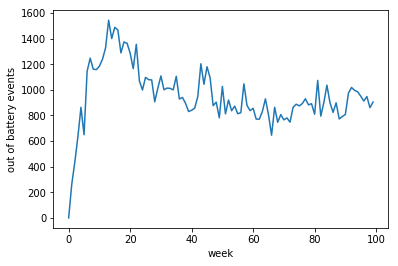

In [64]:
plt.plot(events)
plt.xlabel("week")
plt.ylabel("out of battery events")

In [46]:
length

101

In [47]:
gc.week_out_of_battery_duration.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

In [48]:
file = open('10swap.pickle', 'rb')
gc1 = pickle.load(file)
file.close()

In [49]:
gc1.week_out_of_battery_duration.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [50]:
file = open('local_search15weeks.pkl', 'rb')
gc2 = pickle.load(file)
file.close()

In [52]:
gc2.week_out_of_battery_duration

{0: 0,
 1: 0,
 2: 732820.8054747904,
 3: 1614685.739066584,
 4: 1386921.9546737545,
 5: 1757461.4791895049,
 6: 1903011.4640192548,
 7: 2558332.189092311,
 8: 2569871.176558107,
 9: 1791960.8713904135,
 10: 4075902.9088559747,
 11: 2616605.771537628,
 12: 2413929.846376952,
 13: 2031974.301211942,
 14: 2231159.548214875,
 15: 1992293.6800468825,
 16: 1873642.8462564535}

In [57]:
index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

In [59]:
y = []
for i in index:
    y.append(gc.week_out_of_battery[i])
y

[0,
 262,
 436,
 634,
 864,
 650,
 1145,
 1248,
 1162,
 1158,
 1185,
 1239,
 1328,
 1544,
 1401,
 1364,
 999,
 1013,
 1000,
 831,
 1044,
 782,
 873,
 838,
 930,
 807,
 888,
 892,
 1037,
 792,
 985,
 905]

Text(0,0.5,'out of battery events')

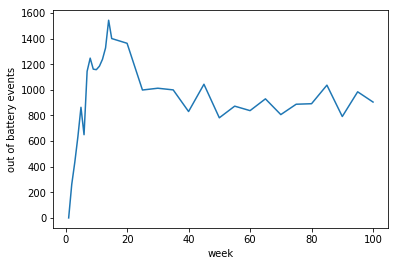

In [63]:
plt.plot(index, y)
plt.xlabel("week")
plt.ylabel("out of battery events")

In [68]:
afile = open('100_weeks', 'wb')
pickle.dump(gc, afile)
afile.close()

In [62]:
min(y[15:])

782

In [65]:
swap_six_pairs = [3254, 3267, 3199, 3202, 3276, 3192, 3186, 3183, 237, 3072, 3178, 3290, 491, 3285, 3314, 411, 3165, 3205, 383, 527, 3357, 347, 474, 484, 504, 3244, 2021, 3282, 528, 529, 2008, 531, 518, 3383, 3427, 3443, 3137, 3139, 3156, 426, 3436, 3372, 3376, 3184, 363, 3134, 3163, 3283, 3286, 444, 472, 3293, 3295, 281, 514, 402, 3132, 285, 3164, 435, 423, 486, 3173, 3224, 537, 3056, 365, 252, 3146, 359, 387, 388, 405, 410, 3203, 152, 284, 434, 3129, 3151, 3323, 328, 490, 280, 540, 146, 3349, 3366, 3367, 3162, 3336, 3167, 503, 507, 315, 3150, 319, 229, 238, 442, 3226, 327, 446, 479, 499, 508, 513, 316, 335, 3145, 173, 3258, 127, 305, 309, 223, 356, 3320, 128, 296, 433, 3306, 3307, 3308, 3310, 2000, 3312, 3315, 2002, 3318, 2003, 3321, 3328, 3329, 3331, 2006, 432, 3297, 3298, 3346, 3303, 3351, 324, 3304, 3358, 3360, 3361, 3362, 83, 3311, 340, 217, 422, 427, 430, 336, 539, 545, 3319, 546, 428, 523, 251, 397, 3148, 3288, 3158, 419, 3409, 3294, 332, 249, 396, 3141, 3142, 3292, 3263, 536, 3016, 3289, 3259, 3260, 395, 3428, 3136, 3429, 3434, 3435, 3373, 3438, 3378, 3440, 3423, 3447, 3449, 3453, 3382, 3454, 3457, 3459, 3461, 3462, 3463, 3464, 3466, 519, 497, 459, 358, 3002, 368, 3256, 151, 293, 382, 168, 3255, 505, 477, 3374, 379, 457, 509, 458, 462] 

In [75]:
start_time = time(2017,7,1,hour= 6)
end_time=start_time+ td(weeks=50)

In [76]:
initial_stations=eval(open(("steady_states_751/steady_ebikes_initial_0.5.txt")).read())
for station in initial_stations.keys():
    if station in swap_six_pairs:
        initial_stations[station]['edock'] = initial_stations[station]['ecap']
    else:
        initial_stations[station]['edock'] = 0

In [77]:
gc1=simulation_record_charging_amount_751_1.GlobalClock(start_time,end_time,initial_stations)
gc1.clockAdvance() 

the total number of ebikes: 11051
the total number of regular bikes: 0
2017-07-01 06:00:01.005679 0
2017-07-08 06:00:00.561339 1
2017-07-15 06:00:03.708410 2
2017-07-22 06:00:01.464095 3
2017-07-29 06:00:03.261424 4
2017-08-05 06:00:03.453529 5
2017-08-12 06:00:00.227695 6
2017-08-19 06:00:01.029477 7
2017-08-26 06:00:02.139948 8
2017-09-02 06:00:00.235947 9
2017-09-09 06:00:01.687714 10
2017-09-16 06:00:00.590313 11
2017-09-23 06:00:00.045832 12
2017-09-30 06:00:03.014556 13
2017-10-07 06:00:00.963840 14
2017-10-14 06:00:00.079123 15
2017-10-21 06:00:00.573688 16
2017-10-28 06:00:00.645244 17
2017-11-04 06:00:01.758281 18
2017-11-11 06:00:01.461482 19
2017-11-18 06:00:02.933159 20
2017-11-25 06:00:03.692421 21
2017-12-02 06:00:00.035459 22
2017-12-09 06:00:00.157036 23
2017-12-16 06:00:00.094356 24
2017-12-23 06:00:02.346965 25
2017-12-30 06:00:01.123948 26
2018-01-06 06:00:03.622757 27
2018-01-13 06:00:00.432012 28
2018-01-20 06:00:02.275532 29
2018-01-27 06:00:04.682791 30
2018-02-0

In [71]:
gc.week_out_of_battery_duration

{0: 0,
 1: 0,
 2: 732820.8054747904,
 3: 1614685.739066584,
 4: 1386921.9546737545,
 5: 1757461.4791895049,
 6: 1908263.628324314,
 7: 2562294.070164594,
 8: 2569868.988722531,
 9: 1791636.1278869137,
 10: 4075902.908855967,
 11: 2617780.120129157,
 12: 2415049.91974698,
 13: 2031897.8384866267,
 14: 2230886.8176450245,
 15: 1992226.7698854916,
 16: 1873642.8462564535,
 17: 2145439.1159321293,
 18: 3394353.358812079,
 19: 2591123.1885061935,
 20: 4975132.72375346,
 21: 3692582.0174183995,
 22: 3260446.891628824,
 23: 2579963.485807419,
 24: 1626867.5436395854,
 25: 2090388.8416403309,
 26: 2465796.454964258,
 27: 2229633.2178659514,
 28: 1593501.3094696552,
 29: 1233322.2366469651,
 30: 2063999.4384459853,
 31: 4436920.364381969,
 32: 1619466.7394911647,
 33: 2936315.2389176786,
 34: 1551498.9465539455,
 35: 1864072.250748679,
 36: 2464171.4853966385,
 37: 2893476.0030902773,
 38: 2309543.5784630924,
 39: 1642898.4604717195,
 40: 1695941.1193241775,
 41: 3097492.2098169625,
 42: 155897

In [72]:
length = len(gc.week_out_of_battery_duration.keys())
durations = []
i = 1
while (i < length):
    durations.append(gc.week_out_of_battery_duration[i])
    i += 1
durations

[0,
 732820.8054747904,
 1614685.739066584,
 1386921.9546737545,
 1757461.4791895049,
 1908263.628324314,
 2562294.070164594,
 2569868.988722531,
 1791636.1278869137,
 4075902.908855967,
 2617780.120129157,
 2415049.91974698,
 2031897.8384866267,
 2230886.8176450245,
 1992226.7698854916,
 1873642.8462564535,
 2145439.1159321293,
 3394353.358812079,
 2591123.1885061935,
 4975132.72375346,
 3692582.0174183995,
 3260446.891628824,
 2579963.485807419,
 1626867.5436395854,
 2090388.8416403309,
 2465796.454964258,
 2229633.2178659514,
 1593501.3094696552,
 1233322.2366469651,
 2063999.4384459853,
 4436920.364381969,
 1619466.7394911647,
 2936315.2389176786,
 1551498.9465539455,
 1864072.250748679,
 2464171.4853966385,
 2893476.0030902773,
 2309543.5784630924,
 1642898.4604717195,
 1695941.1193241775,
 3097492.2098169625,
 1558972.3184905946,
 3545654.7350037694,
 1926017.6835122854,
 3457313.2267710418,
 2796230.961872235,
 3382245.2974028587,
 4269310.751011014,
 3132762.5095471144,
 314755

Text(0,0.5,'out of battery durations')

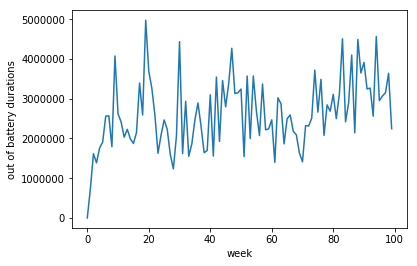

In [74]:
plt.plot(durations)
plt.xlabel("week")
plt.ylabel("out of battery durations")

In [78]:
gc1.week_out_of_battery

{0: 0,
 1: 0,
 2: 346,
 3: 484,
 4: 411,
 5: 721,
 6: 486,
 7: 949,
 8: 924,
 9: 922,
 10: 793,
 11: 814,
 12: 852,
 13: 884,
 14: 893,
 15: 965,
 16: 835,
 17: 916,
 18: 789,
 19: 948,
 20: 999,
 21: 855,
 22: 957,
 23: 1047,
 24: 933,
 25: 827,
 26: 710,
 27: 797,
 28: 994,
 29: 790,
 30: 960,
 31: 1063,
 32: 1052,
 33: 870,
 34: 983,
 35: 871,
 36: 882,
 37: 1014,
 38: 919,
 39: 841,
 40: 822,
 41: 676,
 42: 731,
 43: 1023,
 44: 1184,
 45: 980,
 46: 999,
 47: 1121,
 48: 1016,
 49: 909,
 50: 924,
 51: 957}

In [85]:
length = len(gc1.week_out_of_battery.keys())
y = []
i = 1
while (i < length):
    y.append(gc.week_out_of_battery[i])
    i += 1
y

[0,
 262,
 436,
 634,
 864,
 650,
 1145,
 1248,
 1162,
 1158,
 1185,
 1239,
 1328,
 1544,
 1401,
 1489,
 1468,
 1289,
 1374,
 1364,
 1287,
 1166,
 1356,
 1071,
 999,
 1098,
 1080,
 1078,
 907,
 1013,
 1109,
 1001,
 1014,
 1012,
 1000,
 1106,
 929,
 941,
 896,
 831,
 841,
 858,
 948,
 1204,
 1044,
 1181,
 1095,
 877,
 904,
 782,
 1027,
 813,
 921,
 837,
 873,
 814,
 822,
 1047,
 879,
 838,
 856,
 772,
 771,
 831,
 930,
 806,
 646,
 864,
 747,
 807,
 766,
 781,
 748,
 864,
 888,
 875,
 893,
 931,
 883,
 892,
 810,
 1074,
 795,
 901,
 1037,
 900,
 824,
 899,
 773,
 792,
 808]

In [96]:
sum(y[40:])/len(y[40:])

877.8235294117648

In [84]:
gc1.end_time = gc1.end_time + td(weeks = 20)
gc1.clockAdvance() 

2018-11-10 06:00:01.377056 71
2018-11-17 06:00:00.282843 72
2018-11-24 06:00:02.569694 73
2018-12-01 06:00:03.304946 74
2018-12-08 06:00:00.276584 75
2018-12-15 06:00:00.687934 76
2018-12-22 06:00:00.365872 77
2018-12-29 06:00:15.677155 78
2019-01-05 06:00:01.751123 79
2019-01-12 06:00:00.190898 80
2019-01-19 06:00:03.476582 81
2019-01-26 06:00:01.209487 82
2019-02-02 06:00:01.401392 83
2019-02-09 06:00:01.375025 84
2019-02-16 06:00:01.514543 85
2019-02-23 06:00:04.174627 86
2019-03-02 06:00:02.169998 87
2019-03-09 06:00:00.711689 88
2019-03-16 06:00:04.320400 89
2019-03-23 06:00:03.057105 90
